## The original graph is from the Wall Street Journal
#### Here is the link: https://www.wsj.com/articles/why-oil-is-11-a-barrel-now-but-three-times-that-in-autumn-11587392745

In [1]:
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
from pandas import DataFrame
import pandas as pd
import numpy as np

In [2]:
data = DataFrame()

# This is the data we are using
data['Brent'] = [25.57, 29.21, 31.51, 33.33, 34.75, 35.71, 36.39, 37.0, 37.55, 38.07, 38.45, 38.81, 39.14]
data['WTI'] = [-37.63, 20.43, 26.28, 28.51, 29.84, 30.81, 31.66, 32.41, 33.02, 33.53, 33.98, 34.35, 34.68]

data

,Brent,WTI
0,25.57,-37.63
1,29.21,20.43
2,31.51,26.28
3,33.33,28.51
4,34.75,29.84
5,35.71,30.81
6,36.39,31.66
7,37.00,32.41
8,37.55,33.02
9,38.07,33.53


### If you prefer reading from a file, here is the content of the file

Brent,WTI<br>
25.57,-37.63<br>
29.21,20.43<br>
31.51,26.28<br>
33.33,28.51<br>
34.75,29.84<br>
35.71,30.81<br>
36.39,31.66<br>
37,32.41<br>
37.55,33.02<br>
38.07,33.53<br>
38.45,33.98<br>
38.81,34.35<br>
39.14,34.68<br>

#### copy the data into a empty file and save it as 'data.csv', then use the following to read from the file: 
    data = pd.read_csv('data.csv')

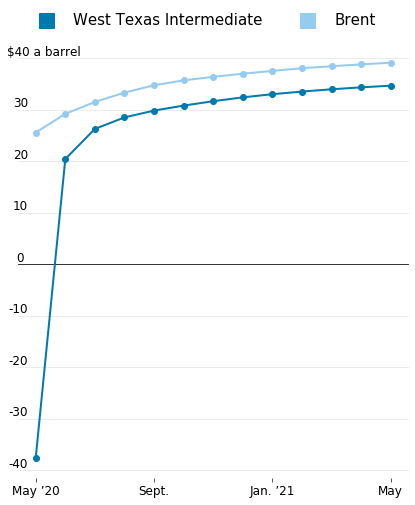

In [3]:
########################## Create the graph #########################
# figsize specifies the size of the plot
# figsize=(7,8) is a graph of width 7 and height 8
fig = plt.figure(figsize=(7,8))
ax = fig.add_subplot()


########################## Deletes the border of the graph #########################
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


########################## Draw the lines with specified style ##########################
ax.plot(data["Brent"], 'o-', color='#95cbee', linewidth=2)
ax.plot(data["WTI"], 'o-', color='#0079ae', linewidth=2)


########################## Ddd horizontal grid lines ##########################
ax.grid(axis='y', color='#e6e6e6')
# adjust the color of the x-axis (notice that it's different from other grid lines)
ax.get_ygridlines()[5].set_color('#030303')



########################## Adjust the x and the y ticks ##########################
########################## (This part is a huge pain) ############################
# one little comment: This is the part that I don't quite understand yet, somehow you have to 
#                     start the label with index 1 (which is the second label). But in general
#                     the first step would be to adjust the number of ticks, and then change 
#                     the corresponding labels

########################## part 1: Adjust the x ticks ##########################
ax.set_xticks(ax.get_xticks()[1::2])
labels = ['May ’20', 'Sept.', 'Jan. ’21', 'May']
ax.set_xticklabels(labels)

ax.xaxis.set_tick_params(labelsize=12, color='#333333')


########################## part 2: Adjust the y ticks ##########################
yticks = ['-50', '-40', '-30', '-20', '-10', '0', '10', '20', '30', '$40 a barrel']
ax.set_yticklabels(yticks)
# length is to specify the length of the small dashed lines on the left of each grid line
ax.yaxis.set_tick_params(labelsize=12, color='#333333', length=0)

# adjust the position of y tick labels
for tick in ax.yaxis.get_majorticklabels():
    tick.set_verticalalignment("bottom")

for tick in ax.yaxis.get_major_ticks():
    tick.set_pad(-10)
ax.yaxis.get_major_ticks()[-2].set_pad(-63) # the position of '$40 a barrel'
ax.yaxis.get_major_ticks()[5].set_pad(-6) # the position of '0'


########################## Add the legend ##########################
rect1 = Line2D([], [], marker="s", markersize=15, linewidth=0, color="#0079ae")
rect2 = Line2D([], [], marker="s", markersize=15, linewidth=0, color="#95cbee")
ax.legend((rect1, rect2), ('West Texas Intermediate', 'Brent'), ncol=2, frameon=False, bbox_to_anchor=(0.95, 1.1), fontsize=15)


plt.show()

In [4]:
fig.savefig('graph.png', dpi=100)

#### Weakness: 
 1. Failed to stick the vertical dashes above the x ticks to the grid lines<br>
 2. The square box of the legend are not close to their labels